# numpy和pytorch实现线性回归

In [36]:
# 线性回归即求解模型参数thita
# 根据解析式暴力求解
def normal_equation(X,y):
    a = np.dot(X.transpose(),X)
    b = np.dot(X.transpose(),y)
    return np.dot(np.linalg.inv(a),b)
#梯度下降法实现
# numpy实现
import numpy as np
x = np.array([1,2,3])
y = np.array([2,4,6])

epoches = 10
lr = 0.1
w = 0
cost=[]

for epoch in range(epoches):
    yhat = x*w
    loss = np.average((yhat-y)**2)
    cost.append(loss)
    dw = -2*(y-yhat)@ x.T/(x.shape[0])
    w=w-lr*dw
    print(w)


1.866666666666667
1.991111111111111
1.9994074074074075
1.9999604938271605
1.999997366255144
1.9999998244170096
1.9999999882944675
1.9999999992196311
1.9999999999479754
1.9999999999965319


In [37]:
import torch as t
%matplotlib inline
from matplotlib import pyplot as plt
from IPython import display 
import numpy as np

In [38]:
# 设置随机数种子，为了在不同人电脑上运行时下面的输出一致
t.manual_seed(1000) 

def get_fake_data(batch_size=8):
    ''' 产生随机数据：y = x*2 + 3，加上了一些噪声'''
    x = t.rand(batch_size,1) * 5
    y = x * 2 + 3 + t.randn(batch_size, 1)
    return x, y

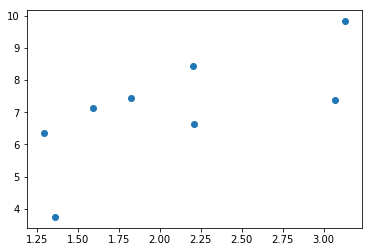

In [39]:
# 来看看产生x-y分布是什么样的
x, y = get_fake_data()
plt.scatter(x.squeeze().numpy(), y.squeeze().numpy())

In [41]:
# 随机初始化参数
w = t.rand(1,1,requires_grad=True)
b = t.zeros(1,1,requires_grad=True)
losses = np.zeros(500)

lr = 0.005

for ii in range(500):
    x,y = get_fake_data(batch_size=32)
    y_pred = x.mm(w) + b.expand_as(y)
    loss = 0.5 * (y_pred - y) ** 2
    loss = loss.sum()
    losses[ii] = loss.item()
    
    # backward：手动计算梯度
    loss.backward()
    
    # 更新参数
    w.data.sub_(lr * w.grad.data)
    b.data.sub_(lr * b.grad.data)
    
    # 梯度清零
    w.grad.data.zero_()
    b.grad.data.zero_() 
print(w.item(), b.item())

1.9926267862319946 3.0668416023254395


# pytorch实现一个简单的神经网络

In [16]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        # nn.Module子类的函数必须在构造函数中执行父类的构造函数
        # 下式等价于nn.Module.__init__(self)
        super(Net, self).__init__()
        
        # 卷积层 '1'表示输入图片为单通道, '6'表示输出通道数，'5'表示卷积核为5*5
        self.conv1 = nn.Conv2d(1, 6, 5) 
        # 卷积层
        self.conv2 = nn.Conv2d(6, 16, 5) 
        # 仿射层/全连接层，y = Wx + b
        self.fc1   = nn.Linear(16*5*5, 120) 
        self.fc2   = nn.Linear(120, 84)
        self.fc3   = nn.Linear(84, 10)

    def forward(self, x): 
        # 卷积 -> 激活 -> 池化 
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2) 
        # reshape，‘-1’表示自适应
        x = x.view(x.size()[0], -1) 
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)        
        return x

net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)
